(1028, 1536) (1038, 6)
1028
(1028, 1536) (1028, 6)


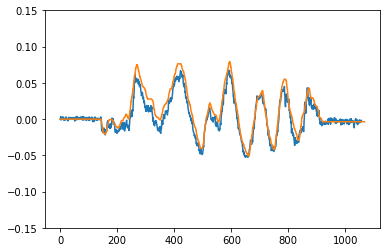

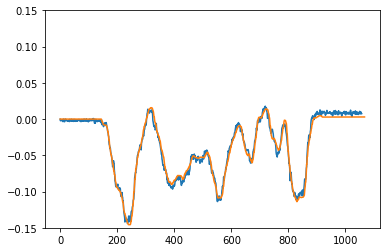

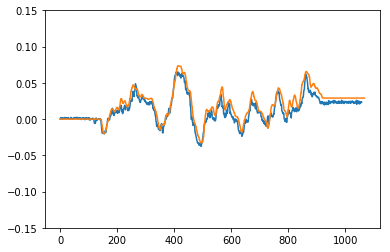

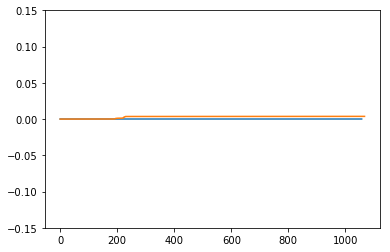

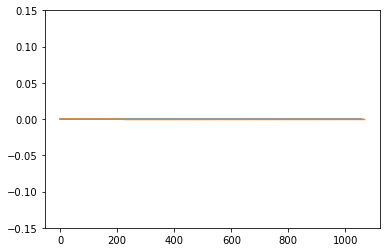

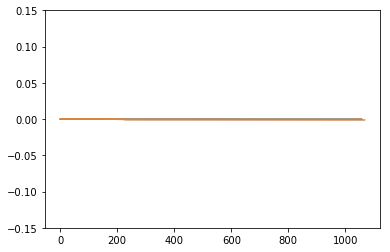

In [15]:
import os, cv2
import matplotlib.pyplot as plt
import numpy as np

def same_size(X,y):
    minlength = min(y.shape[0],X.shape[0])
    print minlength
    y = y[:minlength]
    X = X[:minlength]
    return X,y

gap = 30

#data = np.load('cloth2/controller/data.npz')
data = np.load('cloth_0813/1137/data2_float_40_bg.npz')
vel = data['vel']
pos = data['pos']
feat = data['feat']
y = pos[gap:]-pos[:-gap]

from scipy.ndimage.filters import uniform_filter1d
#compute the gradient of the feature vector
X = feat[gap:]-feat[:-gap]
X = uniform_filter1d(X,5,axis=0) # smooth the input data by 5

print X.shape, y.shape
X,y = same_size(X,y)

print X.shape, y.shape

# begin training
from sklearn import linear_model
model = linear_model.Lasso(alpha =10)

inds = sorted(np.random.choice(len(X), int(len(X)*0.8), replace=False))
X_train = X[inds]
y_train = y[inds]
model.fit(X_train, y_train)

# Use the model to predict the velocity/direction of end effector
target = 0  # target index  
X = feat - feat[target]
y = pos - pos[target]

y_pred = model.predict(X)
for i in range(y_pred.shape[1]):
    axes = plt.gca()
    axes.set_ylim([-0.15,0.15])
    plt.plot(range(y_pred.shape[0]),y_pred[:,i])
    plt.plot(range(y.shape[0]),y[:,i])
    plt.show()

1274


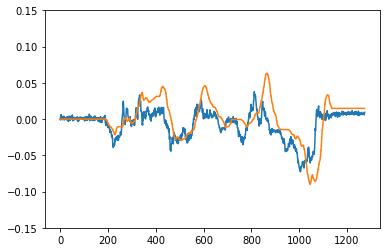

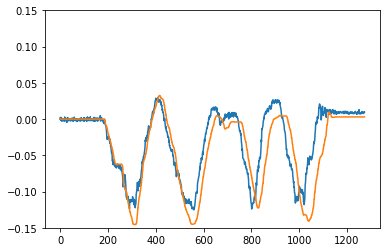

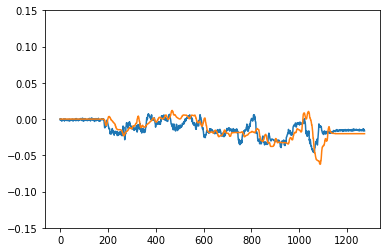

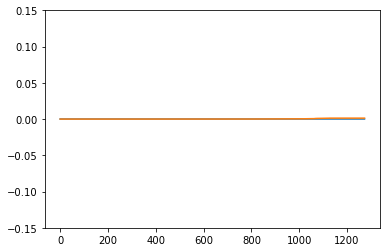

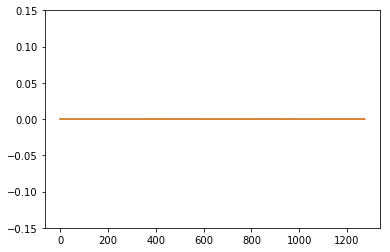

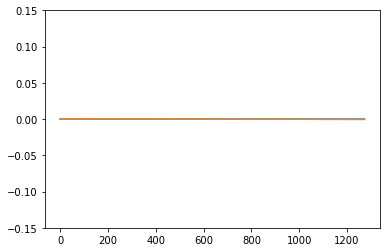

In [16]:
# Another dataset to fit
data = np.load('cloth_0813/1135/data2_float_40_bg.npz')
feat = data['feat']
pos = data['pos']
# Use the model to predict the velocity/direction of end effector
target = 0  # target index  
X = feat[:] - feat[target]
y = pos[:] - pos[target]

X,y = same_size(X,y)

#compute the gradient of the feature vector
y_pred = model.predict(X)



#y_pred = uniform_filter1d(y_pred,30)
for i in range(y_pred.shape[1]):
    axes = plt.gca()
    axes.set_ylim([-0.15,0.15])
    plt.plot(range(y_pred.shape[0]),y_pred[:,i])
    plt.plot(range(len(y)),y[:,i])
    plt.show()